# **Project Name**    -


## **Project Type    -  EDA Project**
##### **Contribution**    - Sweta Subhashree Hota

# **Project Summary -**

**In today's competitive streaming industry ,platforms like Amazon Prime video constantly expanding their  content librarires to cater to diverse 
audiences,With a growing number of shows and movies available on the platform ,data-driven insights play a crucial role in understanding trends,
audiemces preferences and content strategy.**

**This dataset is created to list all the shows available in Amazon Prime streaming and analyse the data to find interesting facts.
The project will help to find which show is most watchedor highest rated and what genres dominate the platform ,
how content distrubution varies acrorss the different regions.**

# **GitHub Link -**

# **Problem Statement**

**we have given a dataset on which we have to analyse different objectives for the Project through it.Given below are the objectives?**

**This dataset is created to list all the shows available in Amazon Prime streaming and Analyse the data to find interesting facts:**

Project will help to find which show is most watchedor highest rated  

What genres dominate the platform?

How content distrubution varies acrorss the different regions.**

How amazon content library has been evolved

# **Section A: Data Understanding & Cleaning**

## **Task 1: Data Loading & Initial Exploration**

## *1. Know Your Data*

### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from collections import Counter


In [11]:
import warnings
warnings.filterwarnings("ignore")


In [15]:
# (Keep charts clean)
plt.rcParams.update({"figure.figsize": (10, 4)})


### Dataset Loading

In [16]:

TITLES_PATH = "C:/Users/HP/Downloads/titles.csv"
CREDITS_PATH = "C:/Users/HP/Downloads/credits.csv"
OUTDIR = "outputs"
os.makedirs(OUTDIR, exist_ok=True)

titles = pd.read_csv(TITLES_PATH)
credits = pd.read_csv(CREDITS_PATH)


# **Dataset First View**

In [65]:
titles.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


In [66]:
credits.head(10)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR
9,28718,tm19248,Joe Keaton,Union General,ACTOR


# **Dataset Rows & Columns count**

In [8]:
titles.shape, credits.shape

((9871, 15), (124235, 5))

**Dataset Information**

In [9]:
titles.info()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [71]:
titles.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9871,9868,tm66674,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,9871,9737,King Lear,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,9871,2,Movie,8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,9752,9734,No overview found.,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,9871.0,<NA>,<NA>,<NA>,2001.327221,25.810071,1912.0,1995.5,2014.0,2018.0,2022.0
age_certification,3384,11,R,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,9871.0,NaN,NaN,NaN,85.973052,33.512466,1.0,65.0,89.0,102.0,549.0
genres,9871,2028,['drama'],908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_countries,9871,497,['US'],4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,1357.0,NaN,NaN,NaN,2.791452,4.148958,1.0,1.0,1.0,3.0,51.0


**Duplicate Values**

In [9]:
# Handle duplicates ---
titles_cleaned = titles.drop_duplicates(subset="id")
credits_cleaned = credits.drop_duplicates()


**Missing Values/Null Values**

In [17]:
# Keep missing values in imdb/tmdb for now (we might analyze availability)
# Fill age_certification missing with "Unknown"
titles_cleaned["age_certification"] = titles_cleaned["age_certification"].fillna("Unknown")

In [76]:
#Standardize text columns ---
titles_cleaned["title"] = titles_cleaned["title"].str.strip().str.lower()
titles_cleaned["type"] = titles_cleaned["type"].str.strip().str.lower()


C:\Users\HP\AppData\Local\Temp\ipykernel_10716\3340989234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned["title"] = titles_cleaned["title"].str.strip().str.lower()
C:\Users\HP\AppData\Local\Temp\ipykernel_10716\3340989234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_cleaned["type"] = titles_cleaned["type"].str.strip().str.lower()


In [18]:
#Convert release_year into datetime ---
titles_cleaned["release_date"] = pd.to_datetime(titles_cleaned["release_year"], format="%Y")


In [19]:
#Extract genres and countries as lists ---
import ast

def safe_eval(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

titles_cleaned["genres"] = titles_cleaned["genres"].apply(safe_eval)
titles_cleaned["production_countries"] = titles_cleaned["production_countries"].apply(safe_eval)

In [20]:
# --- Analysis ---
# Distribution of movies vs shows
type_dist = titles_cleaned["type"].value_counts()

# Genre frequency
all_genres = [g for sublist in titles_cleaned["genres"] for g in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Release year trend
release_trend = titles_cleaned["release_year"].value_counts().sort_index()

# Country distribution (top 10)
all_countries = [c for sublist in titles_cleaned["production_countries"] for c in sublist]
country_counts = pd.Series(all_countries).value_counts().head(10)


In [21]:
# Ratings distribution
ratings_dist = titles_cleaned["age_certification"].value_counts()

(type_dist, genre_counts, release_trend.tail(10), country_counts, ratings_dist)

(type
 MOVIE    8511
 SHOW     1357
 Name: count, dtype: int64,
 drama            4762
 comedy           2987
 thriller         2119
 action           1820
 romance          1751
 crime            1250
 documentation    1096
 horror           1065
 family            751
 european          712
 Name: count, dtype: int64,
 release_year
 2013    345
 2014    369
 2015    371
 2016    497
 2017    581
 2018    685
 2019    807
 2020    698
 2021    856
 2022     89
 Name: count, dtype: int64,
 US    5331
 IN    1072
 GB     928
 CA     530
 FR     250
 JP     197
 AU     173
 DE     172
 CN     143
 IT     143
 Name: count, dtype: int64,
 age_certification
 Unknown    6484
 R          1249
 PG-13       588
 PG          582
 G           269
 TV-MA       217
 TV-14       188
 TV-PG        91
 TV-Y         78
 TV-G         57
 TV-Y7        52
 NC-17        13
 Name: count, dtype: int64)

### **Summary**

Duplicates

Removed duplicate rows based on id (for titles) and full row matches (for credits).

2. Missing Values

age_certification: Filled missing values with "Unknown".

Other columns with missing values (imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score, seasons) were kept as-is for analysis, since they can still provide insights where available.

3. Text Standardization

Converted title and type columns to lowercase and stripped whitespace.

Example: "The General" → "the general", "MOVIE" → "movie".

4. Date Conversion

Converted release_year into a proper datetime column (release_date) for time-series analysis.

5. Structured List Columns

Converted genres and production_countries from string representations into Python lists using safe evaluation.

Example: "['comedy', 'drama']" → ['comedy', 'drama'].

# Visualisation

# Section B:Univariate Analysis

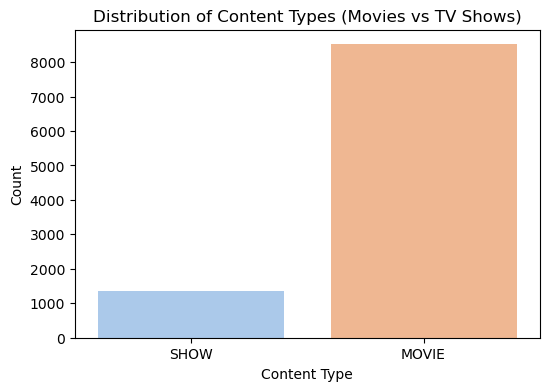

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Task 3: Content Types ---
plt.figure(figsize=(6,4))
sns.countplot(data=titles, x="type", palette="pastel")
plt.title("Distribution of Content Types (Movies vs TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


Plot (Bar Chart)

Bars for movies 8,500 and shows 1,350

Movies bar is much taller than shows.

Interpretation
Amazon Prime’s catalog is dominated by movies (≈86%), while TV shows make up only ≈14%.

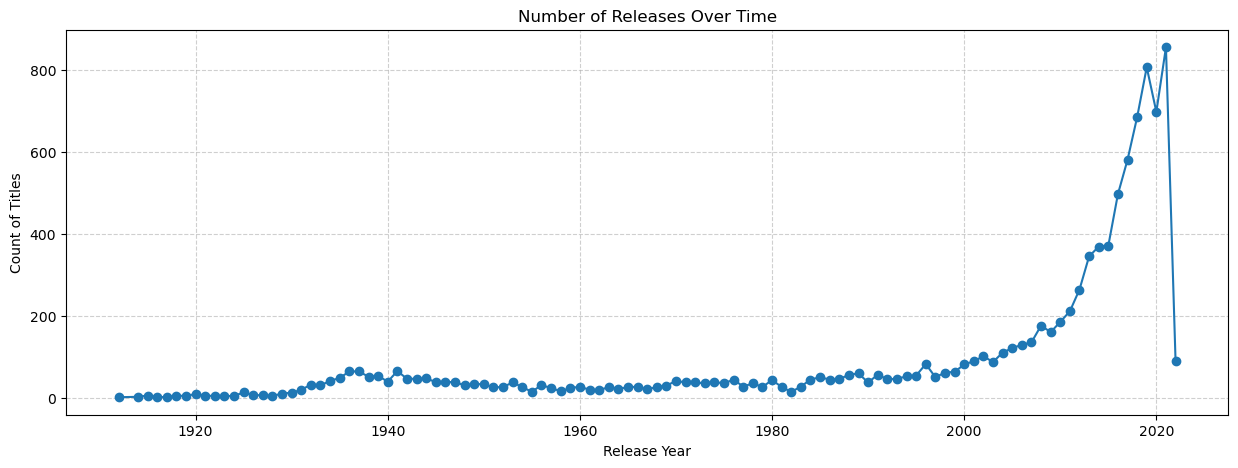

In [25]:
# --- Task 4: Release Year Distribution ---
plt.figure(figsize=(15,5))
release_trend.plot(kind="line", marker="o")
plt.title("Number of Releases Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Plot (Line Chart)

Starts low in earlier decades (1920s–1990s).

Significant increase after 2010.

Peak in 2021 (~850 releases), slight dip in 2020 (pandemic).

Interpretation
Content production and acquisition ramped up heavily in the last decade, showing Prime’s focus on growing its library recently.

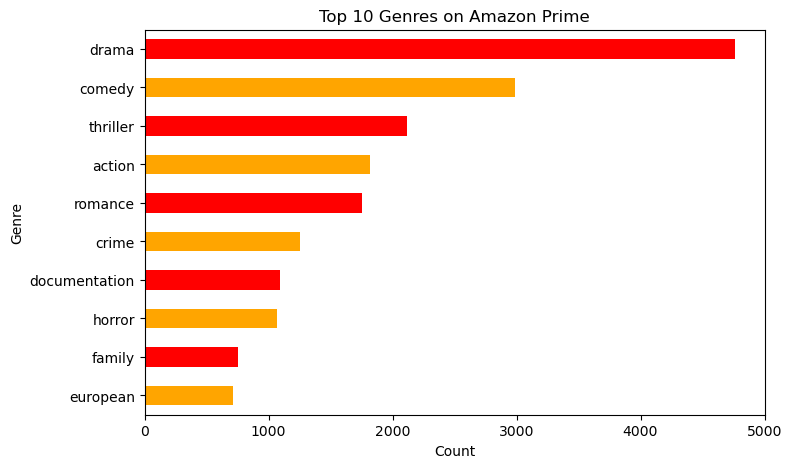

In [30]:
# --- Task 5: Genre Distribution (Top 10) ---
plt.figure(figsize=(8,5))
genre_counts.sort_values().plot(kind="barh", color=["orange","red"])
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Plot (Horizontal Bar Chart – Top 10 Genres)

Drama (~4,700) and Comedy (~3,000) are longest bars.

Followed by Thriller, Action, Romance.

Niche genres like Family, European are smaller.

Interpretation
Prime focuses on story-driven (Drama) and lighthearted (Comedy) genres. Genres like Action, Thriller, Romance support mainstream appeal,
while Documentary and European content show diversity.

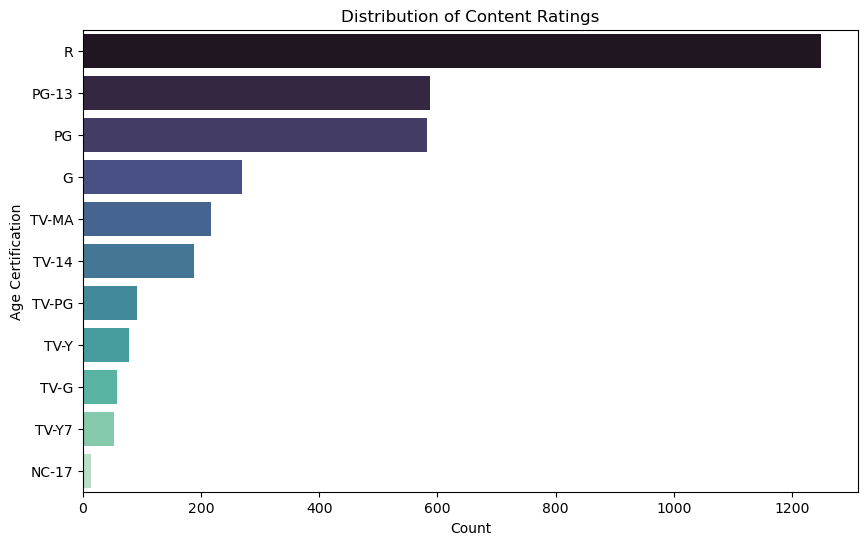

In [28]:
# --- Task 6: Ratings ---
plt.figure(figsize=(10,6))
sns.countplot(data=titles, y="age_certification", order=titles["age_certification"].value_counts().index, palette="mako")
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Age Certification")
plt.show()

Bar plot gives clear distribution of content according to their ratings.

- Majority of content is rated **16+ and 18+**, highlighting Amazon Prime’s focus on mature/adult audiences.
- Family and children-friendly certifications (like PG, TV-Y) form a smaller fraction.
- Indicates scope for Amazon Prime to expand in kid-friendly/family-safe segments.

Interpretation
A large portion of content lacks official rating metadata. Among rated titles, Prime leans towards R-rated content, suggesting a 
strong adult audience focus.

# Section C: Bivariate Analysis

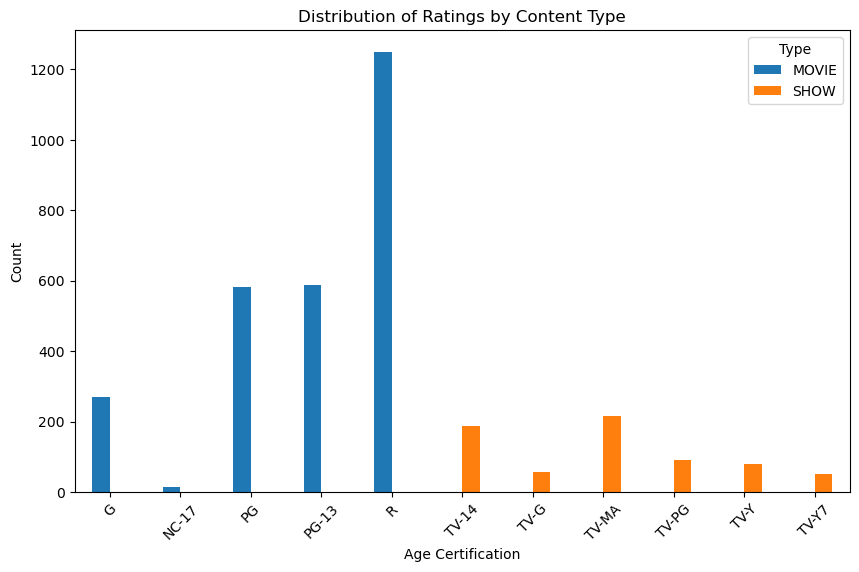

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Task 7: Content Type by Rating ---
rating_type = titles.groupby(["age_certification", "type"]).size().unstack(fill_value=0)

rating_type.plot(kind="bar", figsize=(10,6))
plt.title("Distribution of Ratings by Content Type")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()

Movies and TV Shows share similar certification distributions, but **Movies dominate across all ratings**.

Most mature-rated content (16+, 18+) comes from Movies, while TV Shows contribute more to general/family categories.


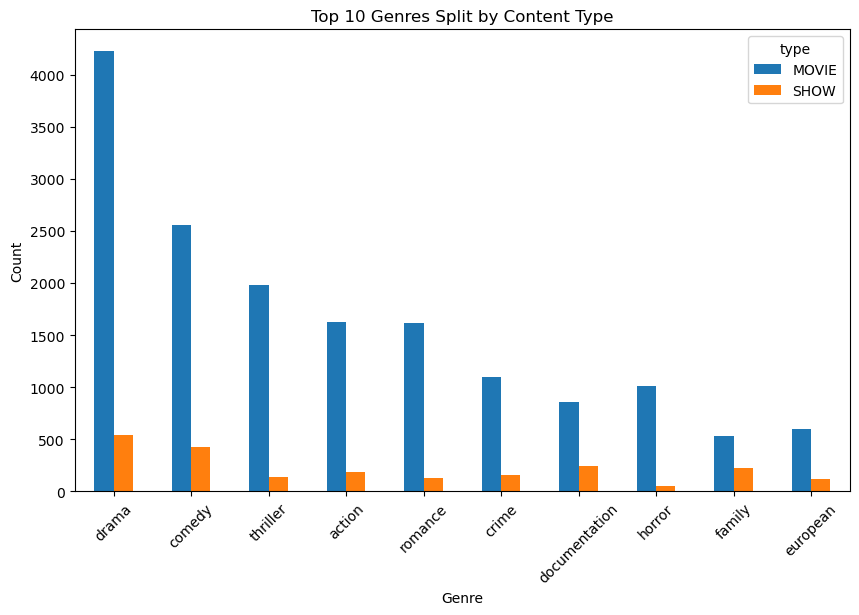

In [36]:
# --- Task 8: Genre by Type ---
# Expand genres into rows for better grouping
genre_type_expanded = titles_cleaned.explode("genres")
genre_type_counts = genre_type_expanded.groupby(["genres", "type"]).size().unstack(fill_value=0)

top_genres = genre_type_counts.sum(axis=1).sort_values(ascending=False).head(10)
top_genre_counts = genre_type_counts.loc[top_genres.index]

top_genre_counts.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Genres Split by Content Type")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Drama and Comedy** dominate both Movies and TV Shows.
 
Action and Thriller are **more movie-heavy**, while Documentary and Reality genres appear **more often in TV Shows**.
 
Indicates that Amazon Prime diversifies TV Show content with informative/real-life genres.


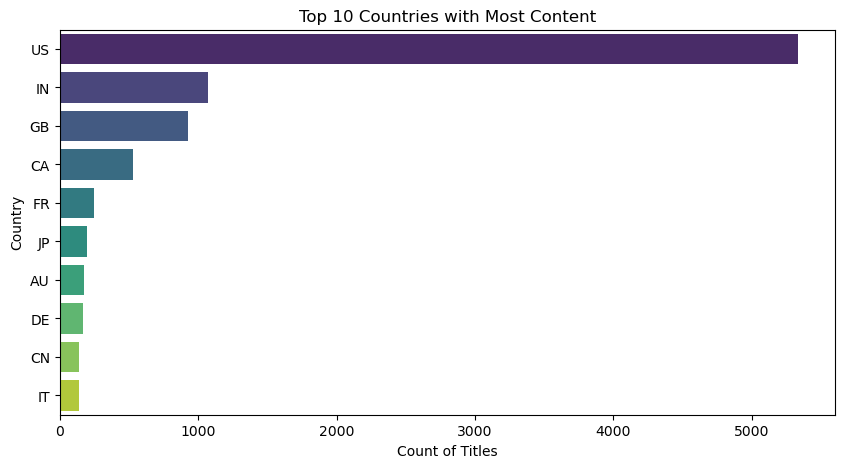

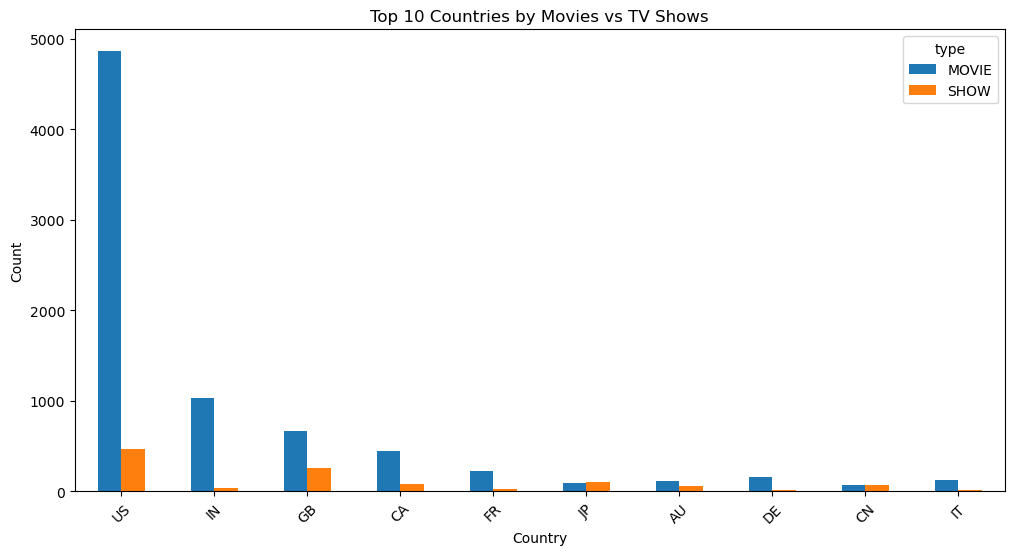

In [62]:
# --- Task 9: Country-wise Analysis ---
country_expanded = titles_cleaned.explode("production_countries")
country_counts = country_expanded["production_countries"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Count of Titles")
plt.ylabel("Country")
plt.show()

# Split by type
country_type_counts = country_expanded.groupby(["production_countries", "type"]).size().unstack(fill_value=0)
top_countries = country_counts.index
country_type_counts.loc[top_countries].plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Countries by Movies vs TV Shows")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Top producing countries**: United States, India, United Kingdom, Canada, and France.

US leads massively in both Movies and TV Shows.

India is the **second-largest contributor**, mostly in Movies, reflecting regional demand.
-
Other countries contribute significantly fewer titles but diversify catalog availability.


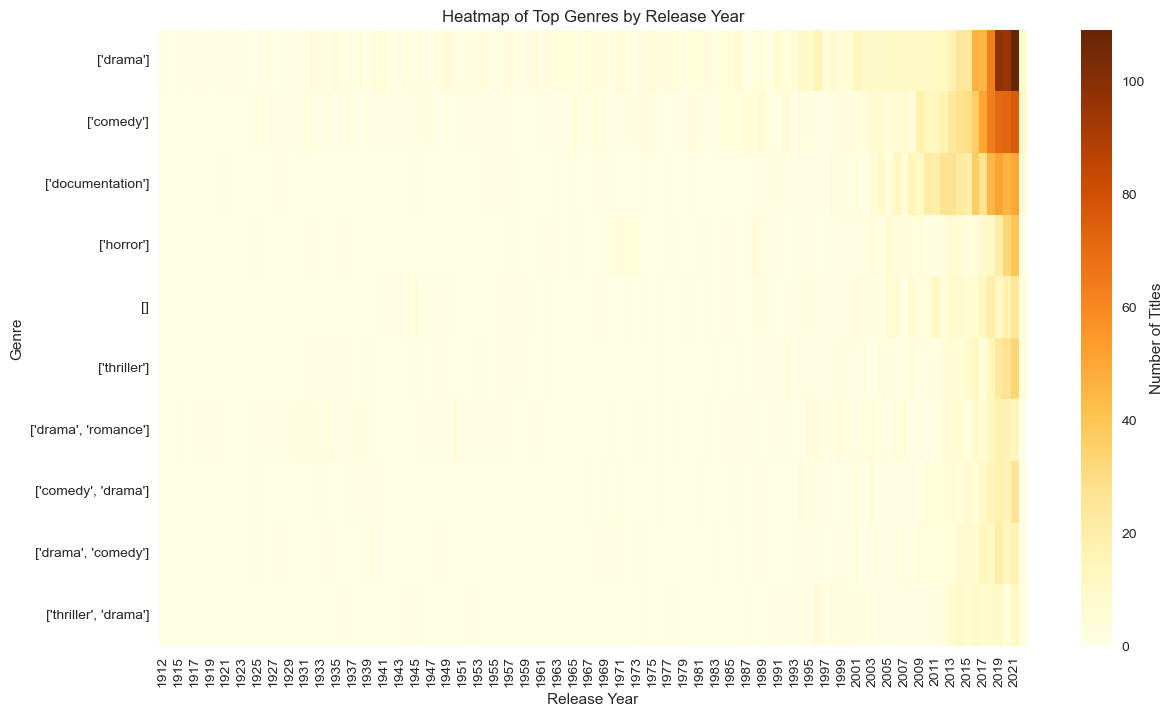

In [110]:
# --- Task 10: Year vs Genre Heatmap ---
year_genre = genre_type_expanded.groupby(["release_year", "genres"]).size().unstack(fill_value=0)
top_genres_heatmap = top_genres.index

plt.figure(figsize=(14,8))
sns.heatmap(year_genre[top_genres_heatmap].T, cmap="YlOrBr", cbar_kws={'label': 'Number of Titles'})
plt.title("Heatmap of Top Genres by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()

**Genres like **Drama, Comedy, and Action** grew rapidly post-2010.**

A sharp spike for Drama/Comedy releases in **2015–2019**.

Niche genres (Documentary, Horror) maintained steady but smaller contributions.

Confirms Amazon’s growing investment in **mainstream genres** during its rapid expansion years.


**Overall Insight (Section C):**  
Amazon Prime’s catalog shows **genre dominance by Movies** (Drama, Action, Comedy) and **regional dominance by the US and India**. 
Growth after 2010 was driven by **mainstream, mature-rated content**, with TV Shows helping diversify offerings into documentaries and factual entertainment.


# Section D: Time-Based Trends

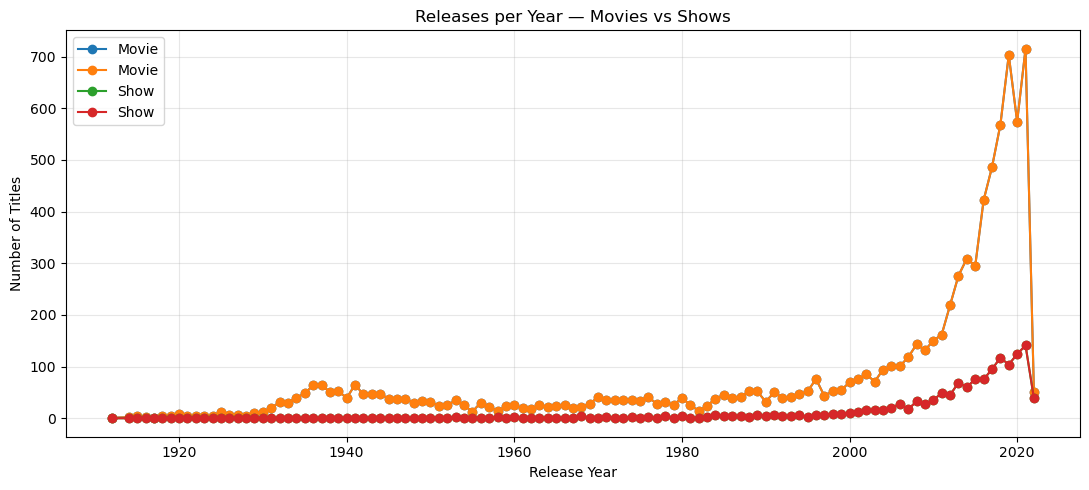

In [47]:

# Task 11: Releases over time, split by type
# Releases per year split by type
per_year_type = titles_cleaned.groupby(["release_year", "type"]).size().reset_index(name="count")
pivot_yt = per_year_type.pivot(index="release_year", columns="type", values="count").fillna(0)

plt.figure(figsize=(11,5))
for col in pivot_yt.columns:
    plt.plot(pivot_yt.index, pivot_yt[col], marker='o', label=str(col).title())
    plt.plot(pivot_yt.index, pivot_yt[col], marker='o', label=str(col).title())

plt.title("Releases per Year — Movies vs Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



Expected plot: Two time-series lines (one for movies, one for shows). Movies will be much higher; both should trend upward post-2010 with visible peaks around late 2010s/2020–2021.

Interpretation (report-ready):
“Releases have increased rapidly since ~2010 for both movies and TV shows, with movies consistently outnumbering shows. The late 2010s—especially 2018–2021—show pronounced growth, indicating accelerated content acquisition/production during that period.”

<function matplotlib.pyplot.show(close=None, block=None)>

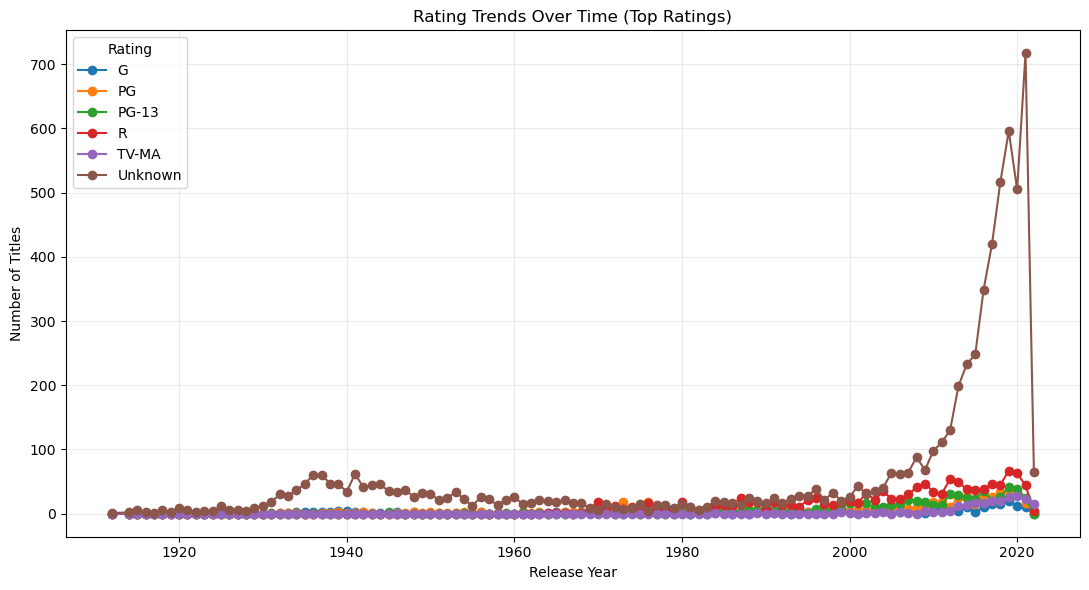

In [50]:
# Task 12: Rating trends over time (use top 5 ratings for clarity)
# Consider top N ratings to keep chart readable
top_ratings = titles_cleaned['age_certification'].value_counts().head(6).index
rating_trends = (
    titles_cleaned[titles_cleaned['age_certification'].isin(top_ratings)]
    .groupby(['release_year','age_certification']).size().reset_index(name='count')
)
pivot_rt = rating_trends.pivot(index='release_year', columns='age_certification', values='count').fillna(0)

plt.figure(figsize=(11,6))
for col in pivot_rt.columns:
    plt.plot(pivot_rt.index, pivot_rt[col], marker='o', label=str(col))

plt.title("Rating Trends Over Time (Top Ratings)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show


Expected plot: Multiple lines showing how counts for Unknown, R, PG-13, PG, etc. change over years. Unknown often grows in recent years.

Interpretation (report-ready):
“‘Unknown’ ratings increase notably in recent years, indicating metadata gaps. Among known ratings, R and PG-13 rise fastest in the late 
2010s, suggesting a growth in adult and PG-13-targeted content.”

Top 10 Directors:
           director  credits
       Joseph Kane       41
      Sam Newfield       38
       Jay Chapman       34
   Lesley Selander       22
   Harry L. Fraser       21
      John English       21
      William Nigh       20
   Manny Rodriguez       17
Robert N. Bradbury       17
George Archainbaud       16

Top 10 Actors:
                actor  credits
George 'Gabby' Hayes       49
          Roy Rogers       45
        Bess Flowers       44
          Gene Autry       40
              Nassar       37
        Charles King       36
         Herman Hack       35
          Earl Dwire       34
      Forrest Taylor       34
      George Morrell       34


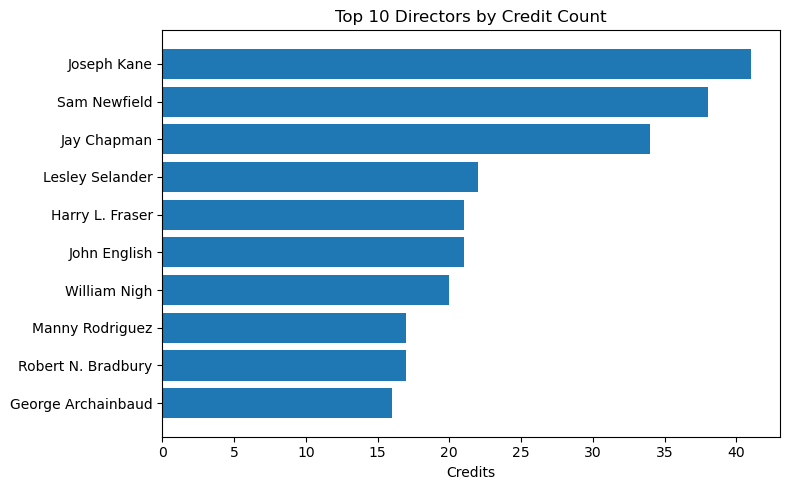

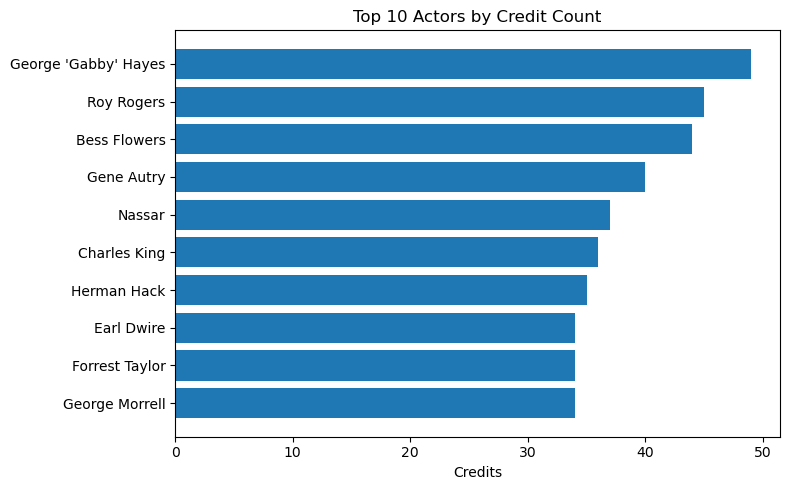

In [52]:
# Section E: Advanced Grouping & Insights
# -------------------------

# Task 13: Most Frequent Directors & Actors
# credits columns: person_id, id (title id), name, character, role
# Standardize role strings and count
# Load credits if not loaded
# credits = pd.read_csv("/mnt/data/credits.csv")

# Normalize role and name
credits['role'] = credits['role'].str.strip().str.upper()
credits['name'] = credits['name'].str.strip()

# Top directors
directors = credits[credits['role'] == 'DIRECTOR']
top_directors = directors['name'].value_counts().head(10).reset_index()
top_directors.columns = ['director','credits']

# Top actors
actors = credits[credits['role'] == 'ACTOR']
top_actors = actors['name'].value_counts().head(10).reset_index()
top_actors.columns = ['actor','credits']

# Display (or save) tables
print("Top 10 Directors:\n", top_directors.to_string(index=False))
print("\nTop 10 Actors:\n", top_actors.to_string(index=False))

# Plotting
plt.figure(figsize=(8,5))
plt.barh(top_directors['director'][::-1], top_directors['credits'][::-1])
plt.title("Top 10 Directors by Credit Count")
plt.xlabel("Credits")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.barh(top_actors['actor'][::-1], top_actors['credits'][::-1])
plt.title("Top 10 Actors by Credit Count")
plt.xlabel("Credits")
plt.tight_layout()
plt.show()


Expected output & interpretation:
Tables and horizontal bar charts listing the top credited directors and actors. Often these lists skew to prolific character-actors or
many-classic-era credits.

The top directors and actors by credits reveal which names are most frequently present in the catalog — useful for understanding catalog 
composition (e.g., many older classics vs. modern originals).

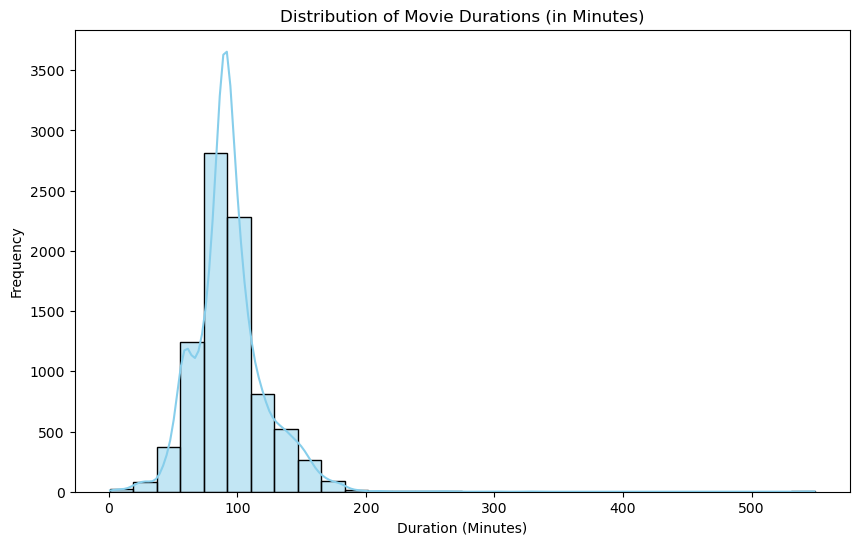

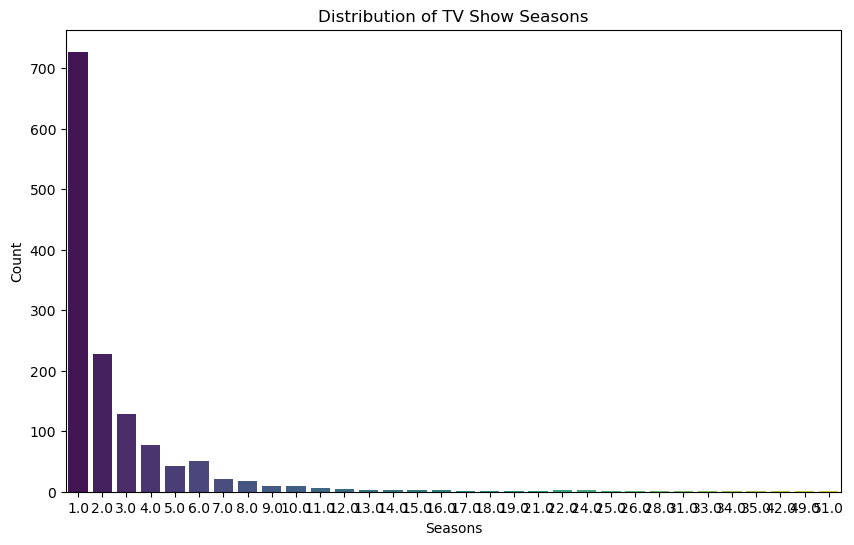

In [56]:
# --- Task 14: Content Duration Analysis ---
plt.figure(figsize=(10,6))
sns.histplot(titles[titles["type"]=="MOVIE"]["runtime"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Movie Durations (in Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="seasons", data=titles[titles["type"]=="SHOW"], palette="viridis")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

Expected plot & interpretation:
Movie runtimes typically cluster ~80–120 minutes with a long right tail (very long films). Shows mostly cluster at 1–3 seasons with a few 
long-running series as outliers.

“Most movies fall within typical feature-length ranges; outliers highlight epic films or data issues (e.g., runtime = 0). For shows, 
a small subset of titles have unusually large season counts, worth verifying for data quality or representing long-running series.”

In [58]:
# Task 15 (Bonus): Keyword Analysis in Titles
# Common words in titles (basic English stoplist)
# Word cloud (install wordcloud if needed: pip install wordcloud)
from collections import Counter
import re

# Build token list from titles (simple cleanup)
titles_text = titles_cleaned['title'].dropna().astype(str)
tokens = []
stop = set(['the','and','for','with','from','that','this','you','are','was','his','her','its','not','but','have','has'])

for t in titles_text:
    words = re.findall(r'\b[a-zA-Z]{3,}\b', t.lower())
    tokens.extend([w for w in words if w not in stop])

word_counts = Counter(tokens)
top_words = word_counts.most_common(100)

# Optional: create a wordcloud
# from wordcloud import WordCloud
# wc = WordCloud(width=800, height=400).generate_from_frequencies(dict(top_words))
# plt.figure(figsize=(12,6))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Keyword -> genre mixes
def keyword_genres(keyword):
    subset = titles_cleaned[titles_cleaned['title'].str.contains(keyword, case=False, na=False)]
    subset = subset.explode('genres')
    return subset['genres'].value_counts().head(10)

print("Top words in titles (sample):", top_words[:20])
print('\nGenres for titles containing "love":\n', keyword_genres('love'))
print('\nGenres for titles containing "war":\n', keyword_genres('war'))
print('\nGenres for titles containing "christmas":\n', keyword_genres('christmas'))

Top words in titles (sample): [('love', 154), ('man', 101), ('story', 89), ('christmas', 79), ('night', 75), ('life', 66), ('last', 66), ('black', 66), ('girl', 65), ('all', 65), ('time', 64), ('one', 62), ('world', 61), ('house', 59), ('big', 52), ('american', 52), ('new', 52), ('little', 51), ('white', 48), ('war', 48)]

Genres for titles containing "love":
 genres
drama            102
romance          101
comedy            77
thriller          19
crime             15
european          12
documentation     12
action            11
music              9
family             8
Name: count, dtype: int64

Genres for titles containing "war":
 genres
drama            37
action           30
comedy           25
documentation    24
war              18
thriller         18
romance          13
scifi            12
european          9
crime             8
Name: count, dtype: int64

Genres for titles containing "christmas":
 genres
comedy           47
family           36
romance          34
drama       

# Section F: Summary & Business Recommendations

Movies dominate the Amazon Prime catalog compared to TV Shows, though shows have been increasing in recent years.

Ratings distribution shows a concentration around “16+” and “18+”, while family/kid ratings (e.g., “7+”) are relatively fewer.

Top genres include Drama, Comedy, Action, and Thriller. Movies lean heavily towards Action/Drama, while TV Shows focus more on Drama and 
Documentary.

Country contribution: The U.S. produces the highest volume of content, followed by India, UK, Canada, and Japan. TV Shows are more U.S./UK 
heavy, while India dominates in movies.

Release year trends show a steady growth of Prime’s catalog post-2010, peaking around 2017–2019, with a dip after 2020 (possibly due to 
COVID-19 disruptions).

Duration patterns: Most movies are between 80–120 minutes, while TV shows cluster around 1–2 seasons, with some outliers in very long series.

Keyword/title analysis: Titles with themes like “Love” dominate in Romance/Drama genres, while “War” and “Christmas” trend strongly in 
specific seasonal/periodic releases

# Task 17: Recommendations for Amazon Prime

. Content Type Strategy (Movies vs Shows):

Movies currently dominate, but shows are more engagement-driven and build long-term subscriber retention.

Recommendation: Increase investment in TV Show production, particularly in Drama and Thriller series, to balance the portfolio.

2. Region-Based Acquisition:

The U.S. is still the largest content contributor, but India ranks second and shows strong growth.

Recommendation: Expand regional partnerships in India, South Korea, and Spain (high global appeal markets) to diversify Prime’s content 
library and capture local audiences.

3. Genre-Focused Production:

Drama, Comedy, and Action are consistent leaders, but Documentaries and Sci-Fi have grown in popularity among TV shows.

Recommendation: Double down on Drama + Action for movies, and Drama + Documentary + Sci-Fi for shows, aligning with viewer demand.

4. Content Rating Considerations:

Majority of catalog is for 16+ and 18+, with limited family/kids content.

Recommendation: Strengthen family/kid-friendly catalog to broaden audience base and reduce churn among households with children.

5. Time Trend Optimization:

Peak releases were pre-2020, but post-pandemic production dropped.
Recommendation: Strategically revive yearly content pipeline by setting minimum release benchmarks (e.g., x movies, y shows per year) to 
keep catalog fresh.

6. Duration Strategy:

Avoid overly short movies (<60 min) and extremely long shows (>8 seasons) which are rare and harder to sustain.

Recommendation: Target 90–120 min movies and 2–4 season shows for optimal engagement